In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import SAUCIE
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from consolidated_runs import run_simulations
from utils import gt_benchmark

sys.path.append(os.getcwd())

Instructions for updating:
non-resource variables are not supported in the long term


### Generate SERGIO and Imputation (only) data for benchmarking & runtime analysis

In [ ]:
datasets = range(1, 4) # DS3
run_simulations(datasets,
                #setting to true will run SERGIO to create clean & noisy data. Must be set to true to run GENIE3 on clean & noisy data
                sergio=False,
                saucie=True, 
                scScope=True, 
                deepImpute=True, 
                magic=True, 
                genie=True,
                arboreto=False,
                pearson=True,
                roc=True,
                precision_recall_k=False
            )

In [40]:
datasets = range(1, 4) # DS1-3
path = './imputations/DS'
sergio_path = './SERGIO/data_sets/'
for dataset in datasets:
    full_path = path + str(dataset) + '/'
    if dataset == 1:   
        target_file = './SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Interaction_cID_4.txt'
        regs_path = './SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Regs_cID_4.txt'
    elif dataset == 2:
        target_file = './SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Interaction_cID_5.txt'
        regs_path = './SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Regs_cID_5.txt'
    else:
        target_file = './SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt'
        regs_path = './SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt'

    # Load target file into np array
    gt_temp = np.zeros(shape=(1200, 1200), dtype=int)
    f = open(target_file,'r')
    Lines = f.readlines()
    f.close()
    # For each real gene and measured gene expressions, set new array at coordinates to 1
    for j in tqdm(range(len(Lines))):
        line = Lines[j]
        line_list = line.split(',')
        target_index = int(float(line_list[0]))
        num_regs = int(float(line_list[1]))
        # skip if gene is not present in filtered dataset
        for i in range(num_regs):
            reg_index = int(float(line_list[i+2]))
            gt_temp[reg_index,target_index] = 1  
    matrix = gt_temp.copy()

    asymmetric_1s = np.sum((matrix == 1) & (matrix.T == 0))

    total_1s = np.sum(matrix == 1)

    total_cells = matrix.size
    percentage_1s = (total_1s / total_cells) * 100

    # 4. Determine percentage of 1s that are "asymmetric"
    percentage_asymmetric_1s = (asymmetric_1s / total_1s) * 100 if total_1s > 0 else 0

    # 5. Order rows by the number of asymmetric 1s
    asymmetric_1s_per_row = np.sum((matrix == 1) & (matrix.T == 0), axis=1)
    rows_ordered_by_asymmetric_1s = np.argsort(-asymmetric_1s_per_row)  # - for descending order
    tuple_list = [(rows_ordered_by_asymmetric_1s[i], asymmetric_1s_per_row[i]) for i in rows_ordered_by_asymmetric_1s]
                  #zip(rows_ordered_by_asymmetric_1s, np.sort(-asymmetric_1s_per_row))

    # 6. Overall measure of matrix asymmetry
    # One possible measure is the ratio of asymmetric 1s to total 1s

    overall_asymmetry_measure = (np.sum(matrix != matrix.T) / matrix.size) * 100

    # Print results
    print(f"DS{str(dataset)} Asymmetric 1s count:", asymmetric_1s)
    print(f"DS{str(dataset)} Total 1s count:", total_1s)
    print(f"DS{str(dataset)} Total percentage of regulatory pairs:", str(round(percentage_1s, 3)) + "%")
    print(f"DS{str(dataset)} Percentage of 1s that are asymmetric:", str(round(percentage_asymmetric_1s, 3)) + "%")
    print(f"DS{str(dataset)} Rows ordered by # of asymmetric 1s (0-indexed):\n", tuple_list)
    print(f"DS{str(dataset)} Overall measure of matrix asymmetry:", str(round(overall_asymmetry_measure, 3)) + "%")


100%|██████████| 93/93 [00:00<00:00, 335688.70it/s]


DS1 Asymmetric 1s count: 258
DS1 Total 1s count: 258
DS1 Total percentage of regulatory pairs: 0.018%
DS1 Percentage of 1s that are asymmetric: 100.0%
DS1 Rows ordered by # of asymmetric 1s (0-indexed):
 [(14, 76), (802, 76), (781, 35), (773, 34), (788, 17), (880, 11), (871, 3), (771, 2), (759, 2), (800, 2), (1, 0), (8, 0), (2, 0), (3, 0), (5, 0), (19, 0), (6, 0), (7, 0), (9, 0), (18, 0), (10, 0), (11, 0), (4, 0), (20, 0), (34, 0), (36, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (21, 0), (28, 0), (30, 0), (31, 0), (32, 0), (33, 0), (12, 0), (35, 0), (29, 0), (13, 0), (16, 0), (38, 0), (59, 0), (58, 0), (48, 0), (41, 0), (42, 0), (43, 0), (45, 0), (60, 0), (46, 0), (49, 0), (57, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (47, 0), (15, 0), (78, 0), (76, 0), (37, 0), (39, 0), (79, 0), (40, 0), (61, 0), (63, 0), (64, 0), (77, 0), (65, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (75, 0), (66, 0), (80, 0), (135, 0), (82, 0), (83, 0), (85, 0), (86, 0), (87, 

100%|██████████| 380/380 [00:00<00:00, 351219.81it/s]


DS2 Asymmetric 1s count: 1155
DS2 Total 1s count: 1155
DS2 Total percentage of regulatory pairs: 0.08%
DS2 Percentage of 1s that are asymmetric: 100.0%
DS2 Rows ordered by # of asymmetric 1s (0-indexed):
 [(816, 110), (262, 90), (130, 80), (838, 79), (802, 66), (1110, 64), (822, 61), (743, 56), (824, 53), (780, 49), (885, 47), (1074, 44), (769, 39), (806, 38), (886, 35), (880, 35), (1089, 30), (19, 28), (663, 17), (750, 16), (829, 16), (1098, 15), (1072, 14), (1083, 12), (777, 12), (713, 6), (1055, 6), (757, 6), (1053, 6), (637, 5), (888, 4), (867, 4), (631, 3), (1178, 3), (685, 3), (643, 2), (695, 1), (3, 0), (4, 0), (5, 0), (29, 0), (25, 0), (2, 0), (32, 0), (28, 0), (26, 0), (31, 0), (17, 0), (18, 0), (20, 0), (27, 0), (36, 0), (6, 0), (34, 0), (33, 0), (8, 0), (35, 0), (12, 0), (9, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (62, 0), (60, 0), (73, 0), (40, 0), (42, 0), (43, 0), (44, 0), (45, 0), (48, 0), (49, 0), (51, 0), (50, 0), (7, 0), (61, 0), (70, 0), (16, 0), (10, 0), (1

100%|██████████| 1133/1133 [00:00<00:00, 411548.15it/s]

DS3 Asymmetric 1s count: 2713
DS3 Total 1s count: 2713
DS3 Total percentage of regulatory pairs: 0.188%
DS3 Percentage of 1s that are asymmetric: 100.0%
DS3 Rows ordered by # of asymmetric 1s (0-indexed):
 [(47, 277), (1095, 218), (545, 214), (523, 213), (989, 156), (769, 135), (315, 113), (726, 95), (399, 70), (468, 55), (149, 49), (97, 46), (1077, 43), (299, 40), (618, 36), (543, 34), (503, 32), (876, 30), (949, 30), (105, 29), (524, 28), (623, 25), (597, 23), (731, 21), (445, 21), (436, 20), (392, 20), (344, 19), (1032, 18), (109, 18), (721, 15), (242, 15), (647, 14), (366, 14), (240, 13), (1038, 12), (601, 12), (381, 12), (898, 11), (1090, 11), (126, 11), (371, 11), (1000, 11), (1085, 11), (589, 11), (846, 10), (1131, 10), (74, 10), (325, 10), (1013, 10), (1014, 10), (308, 9), (293, 9), (353, 9), (264, 9), (931, 9), (612, 9), (604, 9), (631, 9), (973, 9), (660, 8), (1153, 8), (333, 8), (198, 8), (664, 7), (158, 7), (55, 7), (629, 7), (615, 7), (558, 7), (1040, 6), (561, 6), (182, 6

In [29]:
algorithms = ['Pearson', 'GENIE3']

data_path = './imputations/DS{}/'
datasets = {
    # 'sergio' : 'DS6_45.npy',
    'magic_2' : 'yhat_MAGIC_t_2.npy',
    'magic_7' : 'yhat_MAGIC_t_7.npy',
    'magic_default' : 'yhat_MAGIC_t_auto.npy',
}

In [4]:
from Pearson.pearson import Pearson
from utils import gt_benchmark, reload_modules, delete_modules 

def run_pearson(path, target, roc, precision_recall_k, method_name, ind):
    dataset = np.transpose(np.load(path))
    pearson = Pearson(dataset, '').values
    gt, rescaled_vim = gt_benchmark(pearson, target)
    ret_dict = {}
    if roc:
        roc_score = roc_auc_score(gt.flatten(), rescaled_vim.flatten())
        ret_dict['DS' + str(ind) + ' Pearson ' + method_name + ' ROC_AUC'] = float('%.2f'%(roc_score))
    if precision_recall_k:
        k = range(1, gt.size)
        precision_k = precision_at_k(gt, rescaled_vim, k)
        ret_dict['DS' + str(ind) + ' Pearson ' + method_name + ' Precision@K'] = precision_k
    print(ret_dict)
    return ret_dict

### Pearson correlations and selected gene pairs

In [2]:
%load_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import SAUCIE
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from consolidated_runs import run_simulations
from utils import gt_benchmark

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
from Pearson.pearson import Pearson
from utils import gt_benchmark, reload_modules, delete_modules 
from sklearn.metrics import precision_recall_curve

def run_pearson(path, target, roc, precision_recall_k, method_name, ind):
    dataset = np.transpose(np.load(path))
    pearson = Pearson(dataset, '').values
    gt, rescaled_vim = gt_benchmark(pearson, target)
    ret_dict = {}
    if roc:
        roc_score = roc_auc_score(gt.flatten(), rescaled_vim.flatten())
        pr_curve = precision_recall_curve(gt.flatten(), rescaled_vim.flatten())
        ret_dict['DS' + str(ind) + ' Pearson ' + method_name + ' ROC_AUC'] = float('%.2f'%(roc_score))
        ret_dict['DS' + str(ind) + ' Pearson ' + method_name + ' PR_Curve'] = pr_curve
    if precision_recall_k:
        k = range(1, gt.size)
        precision_k = precision_at_k(gt, rescaled_vim, k)
        ret_dict['DS' + str(ind) + ' Pearson ' + method_name + ' Precision@K'] = precision_k
    # print(ret_dict)

    return ret_dict, gt, rescaled_vim

In [7]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    #regs
    set2 = set(list2)
    
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    jaccard_index = len(intersection) / len(set2)    
    return jaccard_index

100%|██████████| 93/93 [00:00<00:00, 289799.61it/s]

4858 0.15129151291512918
Best Threshold: 0.33234879594344596
282
[ 7 14  1  1  2  1  8  2  3  1  6  4  7  2 20  5  7  1 10  5  7  2  1  1
  8  1  2  1  2  2  2  3  3  6  2  1  1  1  3  2  2  1  7  5  1  3  4  2
  1 10  3  1  1  1  1  1  1  2  1  2  1  1  5  1  1  1  1  2  1  1  1  1
  1  1  5  1  3  1  3  1  1  7  2  1  1  2  1  3  1  1  3  1  1  1  6  5
  1  1  1  1]
Adjacency List: {0: {0}, 1: {1}, 6: {6}, 8: {8}, 10: {10}, 11: {11}, 12: {12}, 14: {14}, 15: {15}, 16: {16}, 18: {18}, 19: {19}, 20: {20}, 21: {28}, 24: {24}, 28: {21}, 31: {31}, 32: {32}, 33: {33}, 38: {38}, 42: {42}, 43: {43}, 45: {45}, 46: {46}, 49: {49}, 50: {50}, 62: {62}, 74: {74}, 76: {76}, 78: {78}, 81: {81}, 87: {87}, 90: {90}, 94: {94}, 95: {95}}


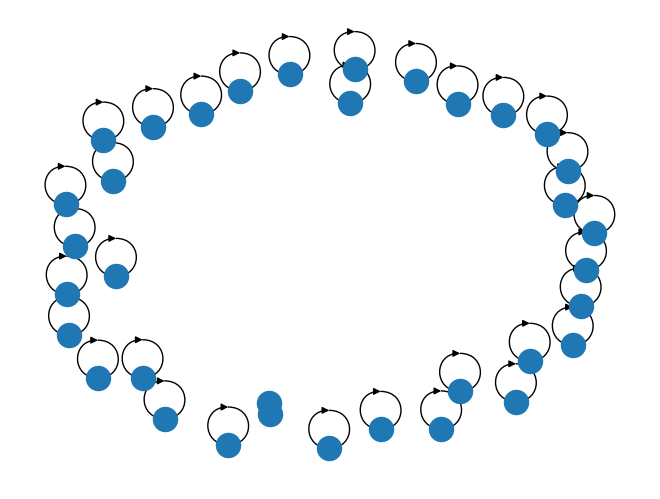

[ 0. 76.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 76.  0.  0.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  2.  0.  0.  0.  0.  0. 34.  0.  0.  0.  0. 17.  0.  0.  0.  0.
  0.  0. 35.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.
  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.]
Adjacency List: dict_keys([1, 14, 62, 67, 74, 84, 93])


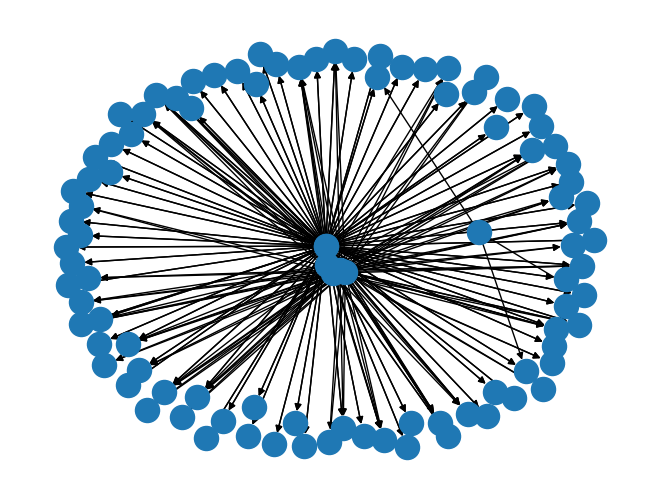

In [35]:
roc, precision_recall_k = True, False
import networkx as nx

for index in range(1, 4):
    reg_file = None
    if index == 1:
        reg_file = './SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Regs_cID_4.txt'
        target_file = './SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Interaction_cID_4.txt'
        regs_path = './SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Regs_cID_4.txt'
    elif index == 2:
        target_file = './SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Interaction_cID_5.txt'
        regs_path = './SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Regs_cID_5.txt'
        reg_file = './SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Regs_cID_5.txt'
    else:
        target_file = './SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt'
        regs_path = './SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt'
        reg_file = 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt'
    ds_str = 'DS' + str(index)
    save_path = './imputations/' + ds_str
    
    master_regs = pd.read_table(reg_file, header=None, sep=',')
    master_regs = master_regs[0].values.astype(int).astype(str).tolist()

    regulators = []
    regulator_file = open(target_file, 'r')
    lines = regulator_file.readlines()
    count = 0
    for line in lines:
        row = line.split(',')
        num_regs_row = int(float(row[1]))
        if num_regs_row != 0:
            if num_regs_row == 1:
                count += 1
            for i in range(2, num_regs_row + 2):
                regulators.append(str(int(float(row[i]))))
    regs = list(set(regulators))
    regs = [int(i) for i in regs if i not in master_regs]

    regs = [int(i) for i in list(set(regulators))]
    pearson_results, gt, vim = run_pearson(save_path + '/DS6_clean.npy', target_file, roc, precision_recall_k, 'Clean', index)
    threshold = 0.5
    #print(pearson_results)
    precision, recall, thresholds = pearson_results[f"DS{index} Pearson Clean PR_Curve"][0], \
        pearson_results[f"DS{index} Pearson Clean PR_Curve"][1], \
        pearson_results[f"DS{index} Pearson Clean PR_Curve"][2]
    
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = [0 if np.isnan(i) else i for i in f1_scores]
    best_index = np.argmax(f1_scores)
    print(best_index, np.max(f1_scores))
    best_threshold = thresholds[best_index]
    print("Best Threshold:", best_threshold)
    
    # plt.plot(recall, precision)
    # plt.xlabel('Recall')
    # plt.ylabel('Precision')
    # plt.title('Precision-Recall curve for DS' + str(index) + ' Pearson Correlation Clean Data')
    # plt.show()

    column_sums = np.sum(gt, axis=0)
    columns_with_sum_one = np.sum(column_sums == 0)
    #print("C_sum", columns_with_sum_one)

    mask = (np.abs(vim) > best_threshold).astype(int)
    print(mask.sum().sum())

    adjacency_list = {i: set() for i in range(mask.shape[0])}

    # Calculate the degree of each node
    degrees = np.sum(mask, axis=1)
    print(degrees)

    # Iterate through the adjacency matrix to populate the adjacency list
    for i in range(mask.shape[0]):  # Iterate over rows (nodes)
        for j in range(mask.shape[1]):  # Iterate over columns (potential connections)
            if mask[i, j] == 1 and i != j:  # There's an edge between node i and j
                if degrees[i] > 1 and degrees[j] <= 2:
                    # Rule 2: Node in a column (i) has > 1 edge, and connected node (j) has degree 1
                    adjacency_list[i].add(j)
                # elif degrees[i] > 2 and degrees[j] < 1:
                #     # The mirrored case: Node i has degree 1 and is connected to node j with degree > 1
                #     adjacency_list[j].add(i)
                elif degrees[i] == 2 and degrees[j] == 2:
                    # Rule 3: Both nodes have degree 1 and share an edge
                    adjacency_list[i].add(j)
                    adjacency_list[j].add(i)
            elif mask[i, j] == 1 and i == j:
                if degrees[i] > 2:
                    adjacency_list[i].add(j)

    G = nx.DiGraph() 
    new_adja_list = adjacency_list.copy()
    for key in adjacency_list.keys():
        if len(adjacency_list[key]) == 0:
            del new_adja_list[key]
        else:
            G.add_edges_from(([(key, i) for i in adjacency_list[key]]))
    print("Adjacency List:", new_adja_list)

    nx.draw(G) 
    plt.show()

    # do the same for GT
    gt = gt
    mask = gt
    adjacency_list = {i: set() for i in range(mask.shape[0])}

    # Calculate the degree of each node
    degrees = np.sum(mask, axis=1)
    print(degrees)

    # Iterate through the adjacency matrix to populate the adjacency list
    for i in range(mask.shape[0]):  # Iterate over rows (nodes)
        for j in range(mask.shape[1]):  # Iterate over columns (potential connections)
            if mask[i, j] == 1 and i != j:  # There's an edge between node i and j
                if degrees[i] > 1 and degrees[j] <= 2:
                    # Rule 2: Node in a column (i) has > 1 edge, and connected node (j) has degree 1
                    adjacency_list[i].add(j)
                # elif degrees[i] > 2 and degrees[j] < 1:
                #     # The mirrored case: Node i has degree 1 and is connected to node j with degree > 1
                #     adjacency_list[j].add(i)
                elif degrees[i] == 2 and degrees[j] == 2:
                    # Rule 3: Both nodes have degree 1 and share an edge
                    adjacency_list[i].add(j)
                    adjacency_list[j].add(i)
            elif mask[i, j] == 1 and i == j:
                if degrees[i] > 2:
                    adjacency_list[i].add(j)

    G = nx.DiGraph() 
    new_adja_list = adjacency_list.copy()
    for key in adjacency_list.keys():
        if len(adjacency_list[key]) == 0:
            del new_adja_list[key]
        else:
            G.add_edges_from(([(key, i) for i in adjacency_list[key]]))
    print("Adjacency List:", new_adja_list.keys())

    pos = nx.spring_layout(G) 
    nx.draw(G, pos=pos)
    plt.show()

    # row_sums = [(i, np.sum(vim[i])) for i, row in enumerate(mask) if np.sum(row) >= 1]
    # sorted_indices = sorted(row_sums, key=lambda x: x[1], reverse=True)
    # multiple_expressed_genes = [int(i) for i, _ in sorted_indices]

    # print("Jaccard similarity between clean multiple expressed genes and regulators:", jaccard_similarity(multiple_expressed_genes, regs))

    # print("# of multiple expressed genes:", len(multiple_expressed_genes))
    # print("# of true regulators:", len(regs))

    # Print overlap of multiple and regs
    overlap = [int(i) for i in regs if int(i) in multiple_expressed_genes]
    # print("Overlap of multiple expressed genes and regulators:", overlap)
    # print("% of true regs in multiple expressed genes:", len(overlap) / len(regs) * 100)

    # Print multiple expressed genes not in regs
    # not_regs = [int(i) for i in multiple_expressed_genes if str(i) not in regs]
    # print("Multiple expressed genes not in regulators:", not_regs)
    # if len(not_regs) > 0:
    #     print("% of multiple expressed genes not in regulators:", len(not_regs) / len(multiple_expressed_genes) * 100)
    # else:
    #     print("% of multiple expressed genes not in regulators: 0")
    # print("Masked Array:\n", mask)
    #print("Row Indices with multiple 1s:", multiple_expressed_genes)
    print("")
    break

    pearson_results, gt, vim = run_pearson(save_path + '/DS6_45.npy', target_file, roc, precision_recall_k, 'Noisy', index)

    mask = (np.abs(vim) > threshold).astype(int)
    row_sums = [(i, np.sum(vim[i])) for i, row in enumerate(mask) if np.sum(row) >= 1]
    sorted_indices = sorted(row_sums, key=lambda x: x[1], reverse=True)
    multiple_expressed_genes = [int(i) for i, _ in sorted_indices]
    # print("Jaccard similarity between noisy multiple expressed genes and regulators:", jaccard_similarity(multiple_expressed_genes, regs))

    # print("# of multiple expressed genes:", len(multiple_expressed_genes))
    # print("# of true regulators:", len(regs))

    # Print overlap of multiple and regs
    overlap = [int(i) for i in regs if int(i) in multiple_expressed_genes]
    # print("Overlap of multiple expressed genes and regulators:", overlap)
    # print("% of true regs in multiple expressed genes:", len(overlap) / len(regs) * 100)
    print("")
